<a href="https://colab.research.google.com/github/dikoharyadhanto/Project-Lomba/blob/main/Project_Lomba_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pendahuluan**

## **Topik dan Permasalahan**

- Apakah upaya yang dilakukan pemerintah sudah efektif?
- Kapan mencapai titik minimum?
- Kebijakan lain apa yang harus dilakukan pemerintah yang bisa menciptakan stabilitas di tingkat minimum?

## **Informasi Tentang Dataset**

**Keterangan Kolom**

1. **Positif**, jumlah orang yang dinyatakan positif terinfeksi virus COVID-19 yang dibuktikan dengan pemeriksaan laboratorium RT-PCR.
2. **Dirawat**, Jumlah orang yang terinfeksi COVID19 dan telah menjalani perawatan
3. **Sembuh**, Jumlah orang yang telah dinyatakan sembuh dari COVID19
4. **Meninggal**, Jumlah orang/korban yang telah meninggal dunia karena COVID19
5. **Kontak Erat**, Jumlah orang yang memiliki kontak erat dengan kasus probable atau konfirmasi COVID19
6. **Pelaku Perjalanan**, Jumlah orang yang melakukan perjalanan dari dalam negeri (Domestik) maupun luar negeri pada 14 hari terakhir
7. **Suspek**, Jumlah orang dengan ISPA (Infeksi Saluran Pernapasan Akut) dan pada 14 hari terakhir sebelum timbul gejala, memiliki riwayat perjalanan atau tinggal di wilayah yang melaporkan transmisi lokal, memiliki riwayat kontak dengan kasus konfirmasi/probable COVID-19 dan memiliki ISPA/Pneumonia berat yang membutuhkan perawatan rumah sakit dan tidak ada penyebab lain.
8. **Probable**. Jumlah orang dengan ISPA berat/ARDS (gagal napas akibat aveolu paru-paru penuh cairan) atau meninggal dengan gambaran klinis yang meyakinkan COVID-19 dan belum ada hasil pemeriksaan lab RT-PCR.
9. **Discarded**, Jumlah orang dengan status kasus suspek dengan hasil pemeriksaan lab RT/PCR 2 kali negatif selama 2 hari berturut-turut dengan selang waktu 24 jam, dan jumlah orang dengan status kontak erat yang telah selesai masa karantina 14 hari.  

# **Import Libraries**

In [5]:
!pip install -U yellowbrick

In [6]:
import pandas as pd
import numpy as np
from google.colab import files
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# **Data Pre-processing**

## **Data 1: Data COVID-19 Maret - Oktober 2020**

### **Load Dataset**

In [7]:
uploaded = files.upload() #Uploading files from local file system

In [8]:
df1 = pd.read_csv('covid-dki-all-2020.csv', sep = ';')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34705 entries, 0 to 34704
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          34705 non-null  int64  
 1   ID                  34705 non-null  int64  
 2   tanggal2            34705 non-null  object 
 3   id_kel              34701 non-null  object 
 4   nama_provinsi       34701 non-null  object 
 5   nama_kota           34701 non-null  object 
 6   nama_kecamatan      34701 non-null  object 
 7   nama_kelurahan      34705 non-null  object 
 8   positif             34705 non-null  int64  
 9   dirawat             34705 non-null  int64  
 10  sembuh              34705 non-null  int64  
 11  meninggal           34705 non-null  int64  
 12  odp                 5923 non-null   object 
 13  odp_meninggal       4304 non-null   float64
 14  proses_pemantauan   6191 non-null   float64
 15  selesai_pemantauan  6191 non-null   float64
 16  pdp 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.



In [9]:
df1.head()

,Unnamed: 0,ID,tanggal2,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,positif,dirawat,sembuh,meninggal,odp,odp_meninggal,proses_pemantauan,selesai_pemantauan,pdp,pdp_meninggal,masih_dirawat,pulang_dan_sehat,kontak_erat,pelaku_perjalanan,self_isolation,perawatan_rs,isolasi_di_rumah,selesai_isolasi,suspek,suspek_meninggal,probable,probable_meninggal,discarded,keterangan
0,0,1,2020-03-25,3173011001,DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,0,0,0,0,4,NaN,1.0,3.0,0.0,NaN,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2020-03-25,3173011006,DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,3,3,0,0,9,NaN,3.0,6.0,3.0,NaN,3.0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,2020-03-25,3173011002,DKI JAKARTA,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,2,2,0,0,4,NaN,0.0,4.0,2.0,NaN,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,2020-03-25,3173011005,DKI JAKARTA,JAKARTA BARAT,CENGKARENG,KAPUK,1,0,0,1,4,NaN,3.0,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,2020-03-25,3173011004,DKI JAKARTA,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,0,0,0,0,2,NaN,0.0,2.0,0.0,NaN,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Merapihkan Row**

In [10]:
df1['id_kel'].unique() #mengecek apakah ada data yang anomali

array(['3173011001', '3173011006', '3173011002', '3173011005',
       '3173011004', '3173011003', '3173021001', '3173021004',
       '3173021006', '3173021005', '3173021002', '3173021003',
       '3173021007', '3173061001', '3173061004', '3173061005',
       '3173061002', '3173061003', '3173051005', '3173051001',
       '3173051007', '3173051006', '3173051004', '3173051003',
       '3173051002', '3173081005', '3173081006', '3173081001',
       '3173081003', '3173081002', '3173081004', '3173071004',
       '3173071005', '3173071006', '3173071003', '3173071001',
       '3173071002', '3173031007', '3173031006', '3173031002',
       '3173031005', '3173031003', '3173031008', '3173031001',
       '3173031004', '3173041007', '3173041011', '3173041003',
       '3173041006', '3173041008', '3173041002', '3173041005',
       '3173041009', '3173041010', '3173041001', '3173041004',
       '3171051002', '3171051001', '3171051003', '3171011002',
       '3171011006', '3171011001', '3171011005', '31710

In [11]:
# Menghapus data-data anomali pada kolom id_kel
df1 = df1.set_index('id_kel').drop(['BELUM DIKETAHUI',
                                    'LUAR DKI JAKARTA', 
                                    'PROSES UPDATE DATA']).reset_index()

### **Memperbaiki Kolom**

Karena kasus ODP dan PDP telah berganti istilah menjadi suspek. Maka kita bisa pindahkan nilai dari kedua kolom tersebut ke kolom suspek. Demikian pula dengan kolom ODP dan PDP meninggal ke kolom suspek meninggal

In [12]:
# Konversi tipe data ke float
df1['odp'] = df1['odp'].astype(float)
df1['self_isolation'] = df1['self_isolation'].astype(float)
df1['positif'] = df1['positif'].astype(float)
df1['dirawat'] = df1['dirawat'].astype(float)
df1['sembuh'] = df1['sembuh'].astype(float)
df1['meninggal'] = df1['meninggal'].astype(float)

# Konversi tipe data ke datetime
df1['tanggal2'] = pd.to_datetime(df1['tanggal2'])

In [13]:
# Menggabungkan kolom 'odp' dan 'pdp' ke kolom 'suspek'
df1['suspek'] = np.where(df1['suspek'].isnull() & df1['odp'].notnull() & df1['pdp'].notnull(), 
                         df1['odp'] + df1['pdp'], df1['suspek'])
df1['suspek'] = np.where(df1['suspek'].isnull() & df1['odp'].notnull(), 
                         df1['odp'], df1['suspek'])
df1['suspek'] = np.where(df1['suspek'].isnull() & df1['pdp'].notnull(), 
                         df1['pdp'], df1['suspek'])

# Menggabungkan kolom 'odp_meninggal' dan 'pdp_meninggal' ke kolom 'suspek_meninggal'
df1['suspek_meninggal'] = np.where(df1['suspek_meninggal'].isnull() & 
                                   df1['odp_meninggal'].notnull() & 
                                   df1['pdp_meninggal'].notnull(), 
                                   df1['odp_meninggal'] + df1['pdp_meninggal'], df1['suspek_meninggal'])
df1['suspek_meninggal'] = np.where(df1['suspek_meninggal'].isnull() & 
                                   df1['odp_meninggal'].notnull(),
                                   df1['odp_meninggal'], df1['suspek_meninggal'])
df1['suspek_meninggal'] = np.where(df1['suspek_meninggal'].isnull() &  
                                   df1['pdp_meninggal'].notnull(), 
                                   df1['pdp_meninggal'], df1['suspek_meninggal'])

Kolom proses_pemantauan akan dipindahkan nilainya ke kolom isolasi_di_rumah. Demikian pula dengan kolom selesai_pemantauan akan dipindahkan nilainya ke kolom selesai_isolasi

In [14]:
# Menggabungkan kolom 'proses_pemantauan' ke kolom 'isolasi_di_rumah'
df1['isolasi_di_rumah'] = np.where(df1['isolasi_di_rumah'].isnull() & df1['proses_pemantauan'].notnull(), 
                                   df1['proses_pemantauan'], df1['isolasi_di_rumah'])

# Menggabungkan kolom 'selesai_pemantauan' ke kolom 'selesai_isolasi'
df1['selesai_isolasi'] = np.where(df1['selesai_isolasi'].isnull() & df1['selesai_pemantauan'].notnull(), 
                                   df1['selesai_pemantauan'], df1['selesai_isolasi'])

Kolom masih_dirawat akan dipindahkan nilainya ke kolom perawatan_rs.

In [15]:
# Menggabungkan kolom 'perawatan_rs' ke kolom 'masih_dirawat
df1['perawatan_rs'] = np.where(df1['perawatan_rs'].isnull() & df1['masih_dirawat'].notnull(), 
                               df1['masih_dirawat'], df1['perawatan_rs'])

Kolom pulang_dan_sehat akan dipindahkan nilainya ke kolom discarded

In [16]:
# Menggabungkan kolom 'pulang_dan_sehat' ke kolom 'discarded'
df1['discarded'] = np.where(df1['discarded'].isnull() & df1['pulang_dan_sehat'].notnull(), 
                                   df1['pulang_dan_sehat'], df1['discarded'])

### **Menghapus Kolom**

In [17]:
# Menghapus kolom yang tidak digunakan
removed_column = ['ID','odp', 'odp_meninggal', 
                  'proses_pemantauan', 'selesai_pemantauan', 
                  'pdp', 'pdp_meninggal', 'masih_dirawat',
                  'pulang_dan_sehat', 'keterangan']                    

df1.drop(removed_column, axis = 1, inplace = True)

### **Mengatasi Missing Values**

In [18]:
# Menghapus missing values
df1.dropna(inplace=True)

In [19]:
# reset index
df1.reset_index(drop=True)

,id_kel,Unnamed: 0,tanggal2,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,positif,dirawat,sembuh,meninggal,kontak_erat,pelaku_perjalanan,self_isolation,perawatan_rs,isolasi_di_rumah,selesai_isolasi,suspek,suspek_meninggal,probable,probable_meninggal,discarded
0,3172051003,5384,2020-07-14,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,39.0,2.0,33.0,0.0,249.0,5.0,4.0,4.0,0.0,100.0,104.0,0.0,0.0,0.0,4.0
1,3173041007,5385,2020-07-14,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,45.0,4.0,29.0,2.0,272.0,0.0,10.0,0.0,0.0,179.0,180.0,1.0,0.0,0.0,22.0
2,3175041005,5386,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,22.0,1.0,16.0,1.0,87.0,2.0,4.0,4.0,0.0,51.0,55.0,0.0,0.0,0.0,22.0
3,3175031003,5387,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,6.0,0.0,5.0,1.0,25.0,0.0,0.0,0.0,0.0,32.0,33.0,1.0,0.0,0.0,0.0
4,3175101006,5388,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,22.0,3.0,15.0,0.0,106.0,2.0,4.0,0.0,1.0,102.0,104.0,1.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28297,3175011006,34700,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,396.0,2.0,369.0,0.0,1408.0,8.0,16.0,13.0,35.0,650.0,706.0,8.0,2.0,0.0,98.0
28298,3175011002,34701,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,338.0,1.0,305.0,0.0,1213.0,6.0,18.0,5.0,242.0,540.0,787.0,0.0,4.0,0.0,49.0
28299,3171031008,34702,2020-11-30,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,355.0,1.0,332.0,0.0,782.0,4.0,12.0,1.0,44.0,494.0,541.0,2.0,0.0,0.0,31.0
28300,3172021007,34703,2020-11-30,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,472.0,4.0,441.0,0.0,1326.0,12.0,19.0,1.0,65.0,792.0,860.0,2.0,0.0,0.0,70.0


## **Data 2: Data Kasus Covid (Webscraping)**

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jakarta, tersedia di https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json.

### **Scraping Dataset**

In [20]:
api = 'https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json'
resp_dki = requests.get(api)
cov_dki_raw = resp_dki.json()

### **Akses Data Covid dengan API**

In [21]:
# Informasi Kolom Dataset
print('Nama-nama elemen utama:\n', cov_dki_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


**Berapa jumlah total kasus COVID-19 di DKI Jakarta?**

In [22]:
print('\nJumlah total kasus COVID-19 di DKI Jakarta : %d' %cov_dki_raw['kasus_total'])


Jumlah total kasus COVID-19 di DKI Jakarta : 859346


**Berapa persentase kematian akibat COVID-19 di DKI Jakarta?**

In [23]:
print('Persentase kematian akibat COVID-19 di DKI Jakarta : %f.2%%' %cov_dki_raw['meninggal_persen'])

Persentase kematian akibat COVID-19 di DKI Jakarta : 1.578526.2%


**Berapa persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta?**

In [24]:
print('Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : %f.2%%' %cov_dki_raw['sembuh_persen'])

Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : 98.221555.2%


Kita dapat mengakses data perkembangan COVID-19 dari waktu ke waktu yang juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya. Data historis perkembangan COVID-19 tersebut tersimpan dengan nama `list_perkembangan`.

In [25]:
cov_dki = pd.DataFrame(cov_dki_raw['list_perkembangan'])
print('Info cov_dki:\n', cov_dki.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       591 non-null    int64
 1   KASUS                         591 non-null    int64
 2   MENINGGAL                     591 non-null    int64
 3   SEMBUH                        591 non-null    int64
 4   DIRAWAT_OR_ISOLASI            591 non-null    int64
 5   AKUMULASI_KASUS               591 non-null    int64
 6   AKUMULASI_SEMBUH              591 non-null    int64
 7   AKUMULASI_MENINGGAL           591 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  591 non-null    int64
dtypes: int64(9)
memory usage: 41.7 KB
Info cov_dki:
 None


In [26]:
cov_dki.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583020800000,2,0,0,2,2,0,0,2
1,1583107200000,2,0,0,2,4,0,0,4
2,1583193600000,2,0,0,2,6,0,0,6
3,1583280000000,2,0,0,2,8,0,0,8
4,1583366400000,0,1,0,-1,8,0,1,7


### **Data Cleansing**

- Menghapus kolom `DIRAWAT_OR_ISOLASI` dan semua kolom yang berisi nilai kumulatif
- Merubah format penulisan semua kolom menjadi huruf kecil
- Mengganti nama kolom `kasus` menjadi `kasus_baru`
- Memperbaiki tipe data pada kolom tanggal menggunakan `pd.to_datetime`

In [27]:
# Mengubah format penulisan data dan mengganti nama kolom
cov_dki_tidy = (cov_dki.drop(columns=[item for item in cov_dki.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                           )

# Konversi data ke datetime
cov_dki_tidy['tanggal'] = pd.to_datetime(cov_dki_tidy['tanggal']*1e6, unit='ns')

In [28]:
print('Lima data teratas:\n', cov_dki_tidy.head())
print('\nLima data terakhir:\n', cov_dki_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-01           2          0       0
1 2020-03-02           2          0       0
2 2020-03-03           2          0       0
3 2020-03-04           2          0       0
4 2020-03-05           0          1       0

Lima data terakhir:
        tanggal  kasus_baru  meninggal  sembuh
586 2021-10-08         150          0     309
587 2021-10-09         100          2       0
588 2021-10-10         140          3      69
589 2021-10-11          41          0     200
590 2021-10-12         143          0       2


# **Export Dataset to CSV File**

In [29]:
# Export Dataset Covid Maret - Oktober 2020
df1.to_csv('data1_covid_dki_detailed_clean.csv', index=True, sep=',')
# Export Dataset Covid Updated
cov_dki_tidy.to_csv('data2_covid_dki_updated.csv', index=False, sep=',')

# **Pemodelan 1: Pengelompokkan Wilayah Berdasarkan Tingkat Paparan Covid-19 dengan K-Means Clustering**

## **Overview**

Dari data covid-19 yang bersumber dari Open Data Jakarta, akan dilakukan pengelompokkan berdasarkan tingkat paparan covid-19. Dengan pengelompokkan ini, diharapkan pemerintah mengetahui mana wilayah-wilayah yang perlu diprioritaskan dalam penanganan covid-19. Wilayah-wilayah tersebut akan dikelompokkan berdasarkan cluster yang dibuat di pemodelan ini sehingga penanganan Covid-19 menjadi lebih efektif dan efisien karena dilakukan berbasis zona wilayah yang lebih mendetail secara *real-time*

## **Tujuan Pemodelan**

- Membuat pemodelan yang bisa mengelompokkan wilayah-wilayah prioritas penanganan Covid-19 di Jakarta
- Dasar berbagai kebijakan yang menyasar wilayah-wilayah tertentu di Jakarta berdasarkan pertimbangan keseimbangan kesehatan dan ekonomi

## **Algoritma Pemodelan yang Digunakan**

Pemodelan ini merupakan pemodelan unsupervised dengan menggunakan K-Means Clustering dan Silhoutte Score untuk mengukur akurasi model. 

## **Data Pre-processing**

### **Load Dataset**

In [30]:
# Import Dataset
df = pd.read_csv('data1_covid_dki_detailed_clean.csv')

# Preview Dataset
df

,Unnamed: 0,id_kel,Unnamed: 0.1,tanggal2,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,positif,dirawat,sembuh,meninggal,kontak_erat,pelaku_perjalanan,self_isolation,perawatan_rs,isolasi_di_rumah,selesai_isolasi,suspek,suspek_meninggal,probable,probable_meninggal,discarded
0,5344,3172051003,5384,2020-07-14,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,39.0,2.0,33.0,0.0,249.0,5.0,4.0,4.0,0.0,100.0,104.0,0.0,0.0,0.0,4.0
1,5345,3173041007,5385,2020-07-14,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,45.0,4.0,29.0,2.0,272.0,0.0,10.0,0.0,0.0,179.0,180.0,1.0,0.0,0.0,22.0
2,5346,3175041005,5386,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,22.0,1.0,16.0,1.0,87.0,2.0,4.0,4.0,0.0,51.0,55.0,0.0,0.0,0.0,22.0
3,5347,3175031003,5387,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,6.0,0.0,5.0,1.0,25.0,0.0,0.0,0.0,0.0,32.0,33.0,1.0,0.0,0.0,0.0
4,5348,3175101006,5388,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,22.0,3.0,15.0,0.0,106.0,2.0,4.0,0.0,1.0,102.0,104.0,1.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28297,34442,3175011006,34700,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,396.0,2.0,369.0,0.0,1408.0,8.0,16.0,13.0,35.0,650.0,706.0,8.0,2.0,0.0,98.0
28298,34443,3175011002,34701,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,338.0,1.0,305.0,0.0,1213.0,6.0,18.0,5.0,242.0,540.0,787.0,0.0,4.0,0.0,49.0
28299,34444,3171031008,34702,2020-11-30,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,355.0,1.0,332.0,0.0,782.0,4.0,12.0,1.0,44.0,494.0,541.0,2.0,0.0,0.0,31.0
28300,34445,3172021007,34703,2020-11-30,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,472.0,4.0,441.0,0.0,1326.0,12.0,19.0,1.0,65.0,792.0,860.0,2.0,0.0,0.0,70.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28302 non-null  int64  
 1   id_kel              28302 non-null  int64  
 2   Unnamed: 0.1        28302 non-null  int64  
 3   tanggal2            28302 non-null  object 
 4   nama_provinsi       28302 non-null  object 
 5   nama_kota           28302 non-null  object 
 6   nama_kecamatan      28302 non-null  object 
 7   nama_kelurahan      28302 non-null  object 
 8   positif             28302 non-null  float64
 9   dirawat             28302 non-null  float64
 10  sembuh              28302 non-null  float64
 11  meninggal           28302 non-null  float64
 12  kontak_erat         28302 non-null  float64
 13  pelaku_perjalanan   28302 non-null  float64
 14  self_isolation      28302 non-null  float64
 15  perawatan_rs        28302 non-null  float64
 16  isol

### **Memilih Feature yang Diperlukan** 

Feature yang akan dipilih adalah feature yang berkaitan dengan tingkat paparan covid-19 seperti `positif`, `dirawat`, `kotak_erat`, `pelaku_perjalanan`, dll. 

In [32]:
# Memilih Feature
feature = ['positif', 'dirawat', 'kontak_erat', 'self_isolation', 
          'perawatan_rs', 'isolasi_di_rumah', 'suspek']

# Membuat Dataframe
df_cluster = df[feature].copy()

# Cek kolom
df_cluster.columns

Index(['positif', 'dirawat', 'kontak_erat', 'self_isolation', 'perawatan_rs',
       'isolasi_di_rumah', 'suspek'],
      dtype='object')

Dari feature yang dipilih, terdapat feature yang bisa digabungkan seperti `dirawat` dan `perawatan_rs`; serta `self_isolation` dan `isolasi_di_rumah`. Untuk itu, feature-feature tersebut akan dijumlahkan menjadi satu. 

In [33]:
# Menggabungkan feature yang mirip
df_cluster['dirawat'] = df_cluster['dirawat'] + df_cluster['perawatan_rs']
df_cluster['isolasi'] = df_cluster['self_isolation'] + df_cluster['isolasi_di_rumah']

# Menghapus feature yang sudah digabungkan
df_cluster.drop(columns=['perawatan_rs', 'self_isolation', 'isolasi_di_rumah'], inplace=True)

# Cek kolom
df_cluster.columns

Index(['positif', 'dirawat', 'kontak_erat', 'suspek', 'isolasi'], dtype='object')

### **Melihat Korelasi Antar Feature**

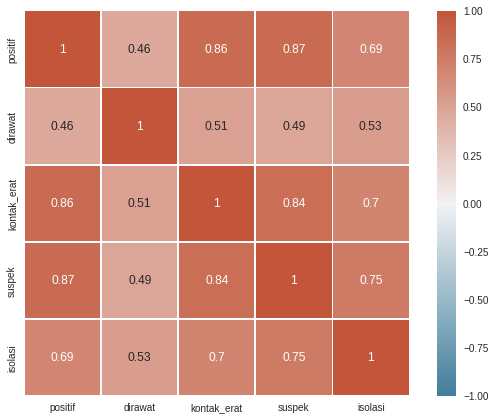

In [34]:
# Plot korelasi
corr = df_cluster.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

Nampaknya, semua feature berkolerasi positif dengan nilai korelasi antara 0,4 sampai 0,9. Umumnya untuk mengurangi kompleksitas model kita perlu mengurangi jumlah feature yang berkorelasi tinggi. Namun karena jumlah feature yang digunakan pada kali ini sedikit, maka tidak perlu mengurangi variabel yang berkorelasi tinggi.

### **Melakukan Standardisasi pada Tiap Feature**

Sebelum melakukan clustering, perlu dilakukan standardisasi supaya tidak ada feature yang mendominasi pengelompokan dikarenakan skala tiap feature yang berbeda-beda.

In [35]:
# Standardisasi  
df_model = StandardScaler().fit_transform(df_cluster)  

# Membuat DataFrame  
df_model = pd.DataFrame(data=df_model, index=df_cluster.index, columns=df_cluster.columns)  

# Preview Dataset
df_model.describe().round(2)

,positif,dirawat,kontak_erat,suspek,isolasi
count,28302.00,28302.00,28302.00,28302.00,28302.00
mean,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.31,-1.40,-1.36,-1.33,-1.23
25%,-0.78,-0.70,-0.73,-0.73,-0.70
50%,-0.19,-0.14,-0.22,-0.21,-0.21
75%,0.53,0.56,0.45,0.46,0.44
max,5.29,6.19,6.28,7.00,8.95


## **Pemodelan**

### **Menentukkan jumlah cluster dengan elbow method**

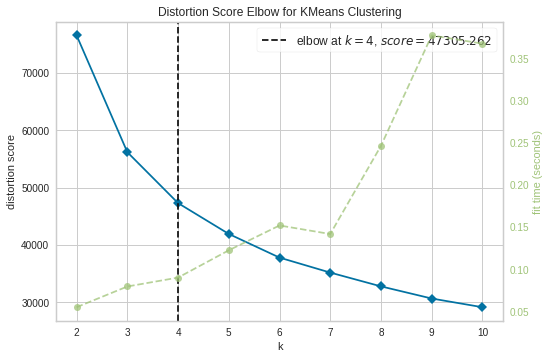

In [36]:
# Elbow Method
model = KMeans(random_state=100, n_init=1)
visualizer = KElbowVisualizer(model)
visualizer.fit(df_model)
visualizer.show()

Jika menggunakan elbow method, jumlah cluster yang disarankan untuk clustering kali ini adalah 4 cluster.

#### Menghitung dan Memplot Silhoutte Score

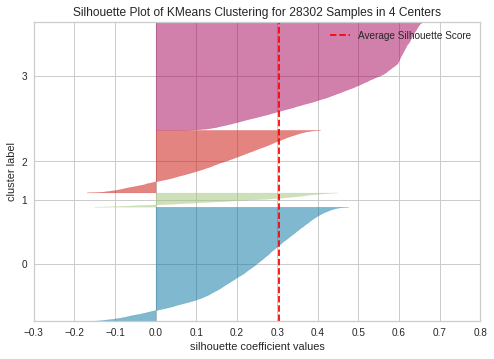

Nilai silhoutte score : 0.30358290667785254


In [37]:
# Silhouette Score
model = KMeans(4, random_state=100, n_init=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick').fit(df_model)
visualizer.show()
print('Nilai silhoutte score :', visualizer.silhouette_score_)

Dengan 4 cluster, koefisien Silhoutte Score yang didapat sebesar 0,31.

### **Membuat Model**

In [38]:
# Inisiasi Model
n = 4
model = KMeans(n_clusters=n, random_state=100, n_init=1).fit(df_model)

# Membuat Cluster
predict = model.predict(df_model)

# Mengurutkan Cluster supaya tidak tertukar tiap run
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(n)
predict = lut[predict]

# Menambahkan Cluster pada df_model
df_model['cluster'] = predict

### **Interpretasi Cluster**

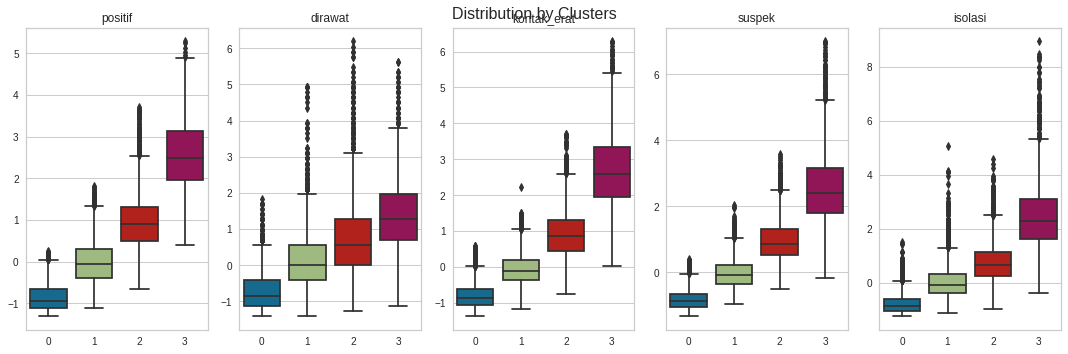

In [39]:
# Plot Distribusi
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
for column, ax in zip(df_model.columns, axes.flat):
    sns.boxplot(data=df_model, x='cluster', y=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.suptitle('Distribution by Clusters', size=16)
plt.tight_layout()
plt.show()

Berdasarkan distribusi tiap variabel, kita bisa melihat pengelompokkan tiap cluster berdasarkan pada tingkat paparan covid-19. Jika kita lihat dari variabel positif, dirawat, dan kontak_erat; cluster 0 merupakan cluster yang paling rendah tingkat paparannya, cluster 1 memiliki tingkat paparan sedang, cluster 2 memiliki tingkat paparan tinggi, dan cluster 3 memiliki tingkat paparan yang paling tinggi. Hasil interpretasi ini bisa digunakan untuk melihat mana daerah-daerah berdasarkan tingkat paparan covid-19.

### **Renaming Cluster**

Setelah mengetahui karakteristik cluster, kita bisa menamai cluster masing-masing seusai tingkat paparannya.

In [40]:
# Menamai dan Menambahkan cluster pada dataset utama
df_model['cluster'] = df_model['cluster'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'})
df['tingkat_paparan'] = df_model['cluster']

### **Melihat Distribusi Feature Berdasarkan Cluster**

Setelah menamai tiap cluster, kita bisa melihat distribusi cluster dari tiap feature yang digunakan. 

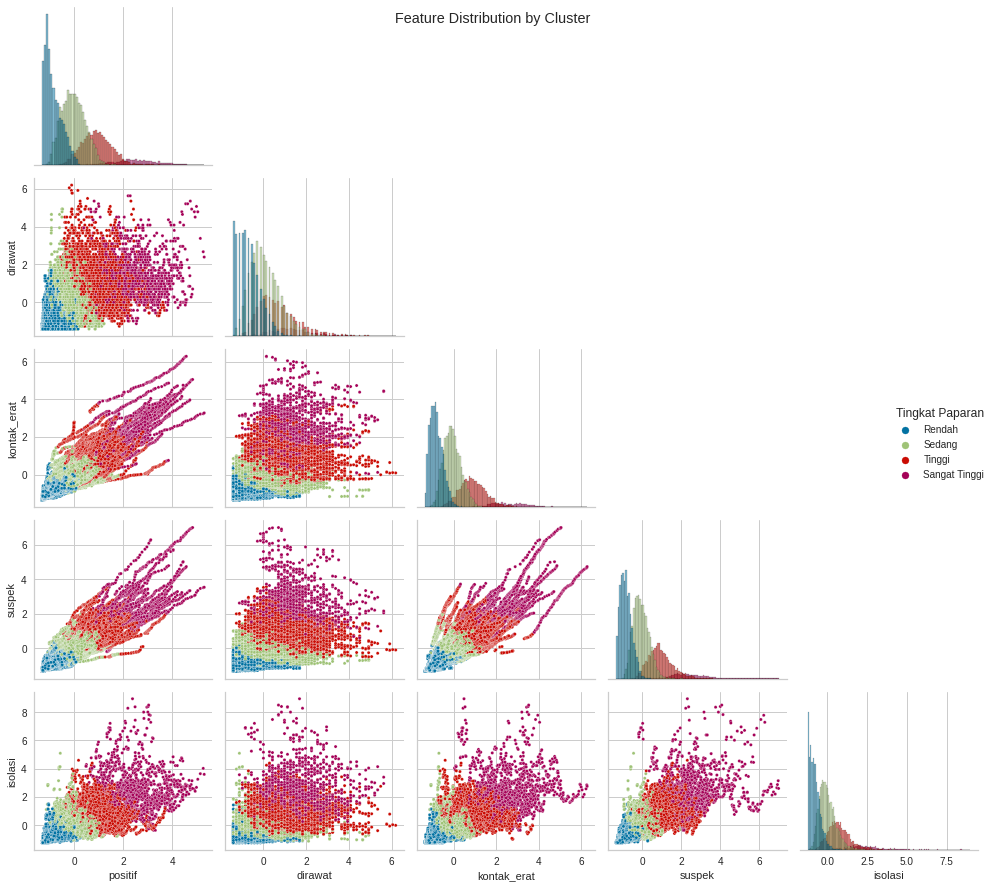

In [41]:
# Plot distribusi cluster
g = sns.PairGrid(df_model, hue='cluster', corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, s=10)
g.add_legend(title='Tingkat Paparan')
g.fig.suptitle('Feature Distribution by Cluster')
plt.tight_layout()
plt.show()

Dari scatter plot diatas terlihat bahwa clustering yang dilakukan sudah sesuai dengan hasil yang diinginkan. Daerah dengan tingkat paparan rendah cenderung memiliki yang jumlah positif yang rendah dan daerah dengan tingkat paparan sangat tinggi cenderung memiliki yang jumlah positif yang tinggi.

## **Menyimpan Data Clustering**

In [42]:
df.to_csv('data1_covid_dki_detailed_clean_with_cluster.csv', index=False)

## **Exploratory Data Analysis (EDA) Model**

## **Jumlah Proporsi Kasus Positif Tiap Kota**

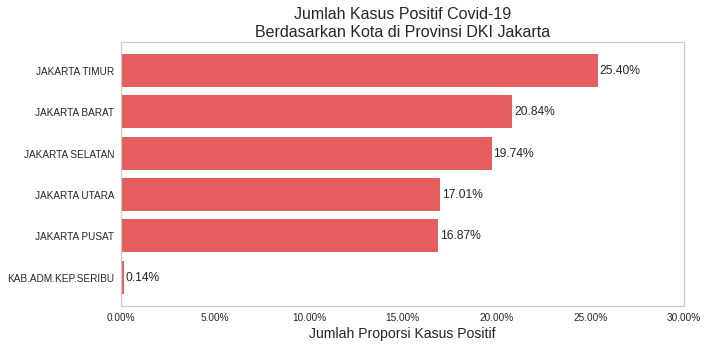

In [43]:
# Membuat Variabel
positif_kota = df.groupby(['nama_kota'])[['positif']].sum().reset_index()
positif_kota['presentase_postif'] = positif_kota['positif'] / positif_kota['positif'].sum()
positif_kota = positif_kota.sort_values(by='positif', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=positif_kota, y='nama_kota', width='presentase_postif', color='#e55e5e')
plt.title('Jumlah Kasus Positif Covid-19\nBerdasarkan Kota di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(positif_kota['presentase_postif'])):
    plt.text(x=v+0.001, y=i , s='{:,.2%}'.format(v), va='center')
plt.xlabel('Jumlah Proporsi Kasus Positif', size=14)
x = plt.gca().get_xticks()
plt.gca().set_xticks(x)
plt.gca().set_xticklabels(['{:,.2%}'.format(i) for i in x])
plt.gca().invert_yaxis()
plt.gca().grid(False)
plt.tight_layout()
plt.show()

Jumlah kasus positif di provinsi DKI Jakarta paling banyak disumbang oleh kota Jakarta Timur sebesar 25%, Jakarta Barat sebesar 21%, Jakarta Selatan sebesar 20%, Jakarta Utara sebesar 17%, Jakarta Pusat sebesar 17%, dan Kepulauan Seribu sebesar 0.14% 

### **Melihat Wilayah Paparan Covid-19**

**Wilayah Paparan Sangat Tinggi di Tingkat Kelurahan**

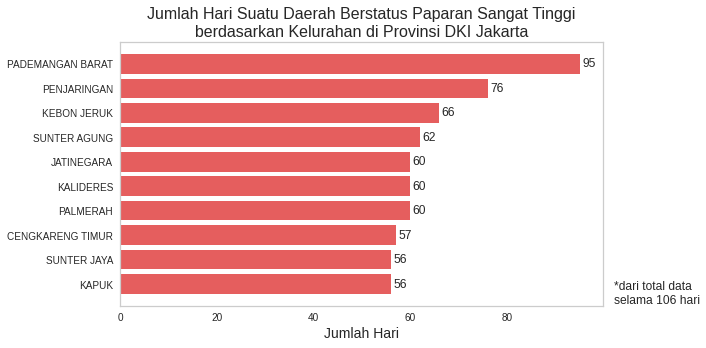

In [44]:
# Membuat Variabel
paparan_kelurahan = df.groupby(['tingkat_paparan', 'nama_kota', 'nama_kecamatan', 'nama_kelurahan'])['tanggal2'].count().reset_index(name='jumlah_hari')
paparan_kelurahan_sangat_tinggi = paparan_kelurahan[paparan_kelurahan['tingkat_paparan'] == 'Sangat Tinggi'].sort_values(by='jumlah_hari', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=paparan_kelurahan_sangat_tinggi, y='nama_kelurahan', width='jumlah_hari', color='#e55e5e')
plt.title('Jumlah Hari Suatu Daerah Berstatus Paparan Sangat Tinggi\nberdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kelurahan_sangat_tinggi['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s=v, va='center')
plt.text(x=102, y=9.4, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().grid(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Di tingkat kelurahan, beberapa kelurahan berada pada tingkat paparan sangat tinggi seperti Kelurahan Pademangan Barat, Penjaringan, Kebon Jeruk. Baiknya, pemerintah perlu berfokus menangani kelurahan-kelurahan dengan tingkat paparan covid-19 yang tinggi.



**Wilayah yang Perlu Diwaspadai**

Selain wilayah yang terpapar covid-19 sangat tinggi, pemprov DKI Jakarta juga perlu mewaspadai wilayah yang sering berada di tingkat paparan tinggi.

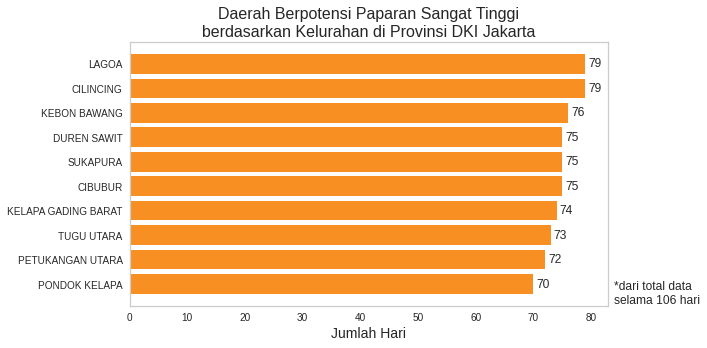

In [45]:
# Membuat Variabel
paparan_kelurahan_tinggi = paparan_kelurahan[paparan_kelurahan['tingkat_paparan'] == 'Tinggi'].sort_values(by='jumlah_hari', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=paparan_kelurahan_tinggi, y='nama_kelurahan', width='jumlah_hari', color='#f78f22')
plt.title('Daerah Berpotensi Paparan Sangat Tinggi\nberdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kelurahan_tinggi['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s=v, va='center')
plt.text(x=paparan_kelurahan_tinggi['jumlah_hari'].max() + 5, y=9.4, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().invert_yaxis()
plt.gca().grid(False)
plt.tight_layout()
plt.show()

Wilayah-wilayah di atas merupakan wilayah yang perlu diwaspadai. Kelurahan-kelurahan di atas sudah berada pada status terpapar tinggi selama hampir 80 hari. Hal ini menunjukan bahwa kelurahan-kelurahan di atas berpotensi untuk menjadi wilayah dengan tingkat paparan yang sangat tinggi.

# **Pemodelan 2: Memprediksi Jumlah Kasus Positif 6 Bulan Kedepan Dengan Menggunakan FBProphet Pada Covid-19 Time Series**

## **Overview**

Pemodelan ini menggunakan data covid yang didapatkan dari https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json dengan API. Kami ingin memprediksi berapa jumlah penambahan kasus baru pada pertengahan tahun 2022 dengan menggunakan Facebook Prophet. 

## **Tujuan Pemodelan**

- Untuk memprediksi berapa perkiraan jumlah kasus baru 6 bulan kedepan, terutama pada awal tahun 2022.
- Sebagai dasar pertimbangan dalam perumusan kebijakan apakah sudah tepat untuk melakukan pelonggaran kebijakan PPKM dalam upaya pemulihan ekonomi, terutama sektor bisnis dan pariwisata DKI Jakarta di tahun 2022 mendatang.

## **Data Pre-processing**

In [46]:
cov_dki_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     591 non-null    datetime64[ns]
 1   kasus_baru  591 non-null    int64         
 2   meninggal   591 non-null    int64         
 3   sembuh      591 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 18.6 KB


In [47]:
#Checking Missing Values
cov_dki_tidy.isnull().sum()

tanggal       0
kasus_baru    0
meninggal     0
sembuh        0
dtype: int64

Pada pemodelan ini, kita hanya menggunakan `kasus_baru` dan `tanggal` untuk dilakukan prediksi.

In [48]:
cov_dki_tidy.tail()

,tanggal,kasus_baru,meninggal,sembuh
586,2021-10-08,150,0,309
587,2021-10-09,100,2,0
588,2021-10-10,140,3,69
589,2021-10-11,41,0,200
590,2021-10-12,143,0,2


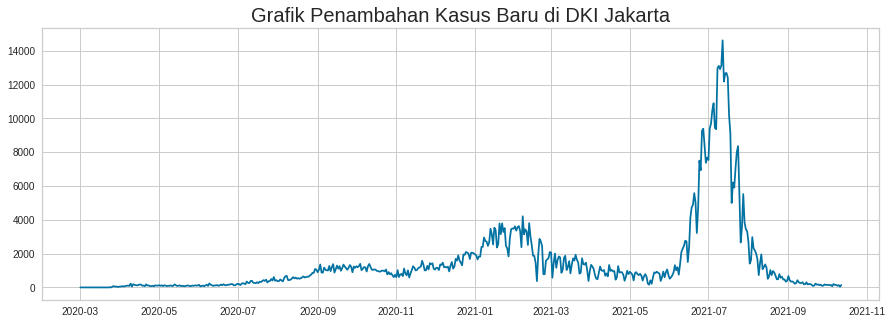

In [49]:
plt.figure(figsize=(15,5))
plt.plot(cov_dki_tidy['tanggal'], cov_dki_tidy['kasus_baru'])
plt.title('Grafik Penambahan Kasus Baru di DKI Jakarta', fontsize=20);

Pada grafik, kita bisa melihat bahwa tren peningkatan terjadi ketika masa-masa awal tahun dan juga masa-masa libur lebaran dan aktivitas mudik. Kedua periode tersebut menjadi penyebab meningkatnya arus migrasi dan aktivitas penduduk sehingga kasus harian mengalami peningkatan

Sesuai grafik, saat ini DKI Jakarta sedang mengalamai trend penurunan kasus baru pasca terjadinya pelonjakan kasus baru yang sangat tinggi pada bulan Juli hingga Agustus. Pertanyaan yang dapat diajukan berapa lama penurunan kasus ini akan tetap bertahan paling tidak hingga tahun mendatang?

### **Mengubah nama kolom**

Untuk kolom `'tanggal'` diganti menjadi `'ds'` sedangkan untuk kolom `'kasus_baru`' diganti menjadi `'y'`

In [50]:
df = cov_dki_tidy[['tanggal', 'kasus_baru']] #filter just only tanggal and kasus_baru shown
df.columns = ['ds', 'y'] #rename column name

df

,ds,y
0,2020-03-01,2
1,2020-03-02,2
2,2020-03-03,2
3,2020-03-04,2
4,2020-03-05,0
...,...,...
586,2021-10-08,150
587,2021-10-09,100
588,2021-10-10,140
589,2021-10-11,41


## **Membangun Model**

In [51]:
df["ds"] = pd.to_datetime(df["ds"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# Membuat dataframe holiday
# lebaran
df_lebaran = pd.DataFrame({'holiday':'Lebaran', 
                           'ds':pd.date_range('2021-06-15', periods=47)})
# mudik
df_tahunbaru = pd.DataFrame({'holiday':'Tahun Baru', 
                             'ds':pd.date_range('2021-01-01', periods=31)})
# Menggabungkan lebaran dan mudik jadi satu dataframe
efek_libur = pd.concat([df_lebaran, df_tahunbaru]).reset_index().drop(columns='index')
efek_libur

,holiday,ds
0,Lebaran,2021-06-15
1,Lebaran,2021-06-16
2,Lebaran,2021-06-17
3,Lebaran,2021-06-18
4,Lebaran,2021-06-19
...,...,...
73,Tahun Baru,2021-01-27
74,Tahun Baru,2021-01-28
75,Tahun Baru,2021-01-29
76,Tahun Baru,2021-01-30


In [53]:
model = Prophet(holidays=efek_libur, 
                changepoint_prior_scale = 0.01, 
                seasonality_prior_scale = 0.1)

In [54]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future = model.make_future_dataframe(periods = 180) #memprediksi untuk 6 bulan kedepan
print('Lima Data Terakhir\n', future.tail())

Lima Data Terakhir
             ds
766 2022-04-06
767 2022-04-07
768 2022-04-08
769 2022-04-09
770 2022-04-10


Yang akan kita prediksi yaitu tercatat yaitu sampai tanggal 10 April 2022

## **Prediksi Model**

In [56]:
# Membuat Dataframe prediksi
prediction = model.predict(future)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Lebaran,Lebaran_lower,Lebaran_upper,Tahun Baru,Tahun Baru_lower,Tahun Baru_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,17.360384,-1207.230693,1502.527440,17.360384,17.360384,0.0,0.0,0.0,0.0,0.0,0.0,149.145967,149.145967,149.145967,0.0,0.0,0.0,149.145967,149.145967,149.145967,0.0,0.0,0.0,166.506351
1,2020-03-02,21.320093,-1430.443029,1318.922532,21.320093,21.320093,0.0,0.0,0.0,0.0,0.0,0.0,-36.030437,-36.030437,-36.030437,0.0,0.0,0.0,-36.030437,-36.030437,-36.030437,0.0,0.0,0.0,-14.710344
2,2020-03-03,25.279802,-1686.769890,1184.325141,25.279802,25.279802,0.0,0.0,0.0,0.0,0.0,0.0,-271.175291,-271.175291,-271.175291,0.0,0.0,0.0,-271.175291,-271.175291,-271.175291,0.0,0.0,0.0,-245.895488
3,2020-03-04,29.239512,-1417.694474,1341.976362,29.239512,29.239512,0.0,0.0,0.0,0.0,0.0,0.0,-75.593978,-75.593978,-75.593978,0.0,0.0,0.0,-75.593978,-75.593978,-75.593978,0.0,0.0,0.0,-46.354467
4,2020-03-05,33.199221,-1230.644481,1452.847161,33.199221,33.199221,0.0,0.0,0.0,0.0,0.0,0.0,59.638790,59.638790,59.638790,0.0,0.0,0.0,59.638790,59.638790,59.638790,0.0,0.0,0.0,92.838010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2022-04-06,442.398337,-1043.831768,1760.562829,326.923258,553.766555,0.0,0.0,0.0,0.0,0.0,0.0,-75.593978,-75.593978,-75.593978,0.0,0.0,0.0,-75.593978,-75.593978,-75.593978,0.0,0.0,0.0,366.804359
767,2022-04-07,440.419207,-820.362958,1905.022245,324.230515,552.536209,0.0,0.0,0.0,0.0,0.0,0.0,59.638790,59.638790,59.638790,0.0,0.0,0.0,59.638790,59.638790,59.638790,0.0,0.0,0.0,500.057997
768,2022-04-08,438.440076,-831.188812,1941.307456,320.512646,551.238561,0.0,0.0,0.0,0.0,0.0,0.0,72.502861,72.502861,72.502861,0.0,0.0,0.0,72.502861,72.502861,72.502861,0.0,0.0,0.0,510.942938
769,2022-04-09,436.460946,-963.289084,1949.053016,316.334784,550.008114,0.0,0.0,0.0,0.0,0.0,0.0,101.512088,101.512088,101.512088,0.0,0.0,0.0,101.512088,101.512088,101.512088,0.0,0.0,0.0,537.973034


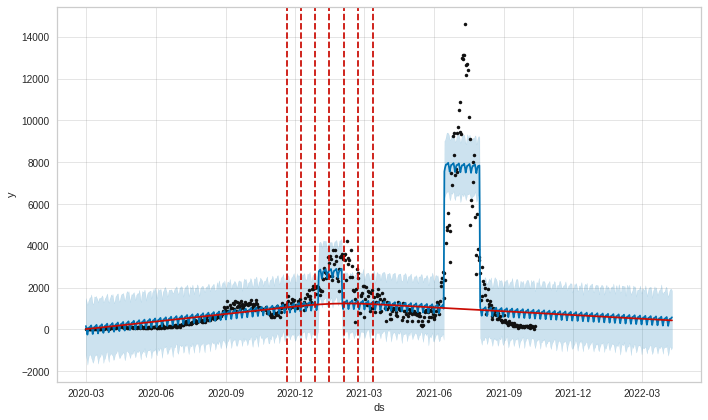

In [57]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

Perhatikan pada grafik
- Titik hitam, menunjukkan nilai sebenarnya atau actual values.
- Garis biru, menunjukkan nilai yang diprediksi atau predicted values.
- Garis merah, menunjukkan trend
- Garis dash merah, menunjukkan changepoints atau titik perubahan grafik yang terjadi
- Area biru muda, menunjukkan Uncertainty Intervals atau potensi suatu trend akan mengalami perubahan di masa yang akan datang

Berdasarkan grafik, selama 6 bulan kedepan sebenarnya menunjukkan terjadinya kecenderungan kestabilan rendahnya angka penambahan jumlah kasus positif di DKI Jakarta paling tidak hingga 6 bulan kedepan. Diprediksi angka penambahan kasus positif kisaran dibawah 500 kasus harian dengan asumsi pengendalian masih terkendali dan vaksinasi terus bertambah.

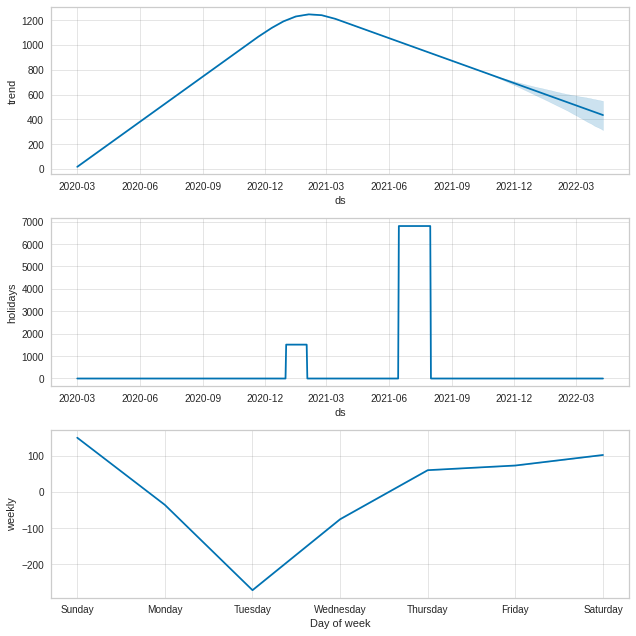

In [58]:
model.plot_components(prediction)
plt.show()

## **Evaluasi Model**

In [59]:
# Evaluasi model dengan Cross Validation
df_cv = cross_validation(model, initial='30 days', period='14 days', horizon = '7 days', parallel="processes")
df_cv

INFO:fbprophet:Making 40 forecasts with cutoffs between 2020-04-07 00:00:00 and 2021-10-05 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fd5dbe04550>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-08,66.636010,42.017331,90.289116,90,2020-04-07
1,2020-04-09,78.732230,55.227572,102.427532,228,2020-04-07
2,2020-04-10,83.042894,60.653922,106.992302,53,2020-04-07
3,2020-04-11,76.625565,52.542086,99.928733,190,2020-04-07
4,2020-04-12,86.441548,63.068690,110.597539,156,2020-04-07
...,...,...,...,...,...,...
275,2021-10-08,1033.911767,-417.020568,2485.881778,150,2021-10-05
276,2021-10-09,1060.801733,-406.570711,2514.156797,100,2021-10-05
277,2021-10-10,1109.691999,-375.643738,2583.397687,140,2021-10-05
278,2021-10-11,923.453375,-403.070152,2384.242689,41,2021-10-05


In [60]:
# Melihat nilai MAE
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.225418e+06,1106.986141,711.123078,0.764067,0.365242,0.400
1,2 days,1.485268e+06,1218.715872,707.684432,0.867149,0.357848,0.450
2,3 days,1.948592e+06,1395.919927,819.887086,0.912690,0.423915,0.400
3,4 days,1.748585e+06,1322.340688,812.796520,1.093462,0.344791,0.350
4,5 days,1.329398e+06,1152.995217,698.078725,0.913526,0.385709,0.425
5,6 days,1.693947e+06,1301.517002,746.544160,1.588816,0.438841,0.425
6,7 days,1.047626e+06,1023.535853,663.757477,1.214225,0.426162,0.400


In [61]:
# Nilai MAE untuk akurasi 90%
minMAE = (df['y'].max() - df['y'].min()) * (10/100)
print('Nilai MAE untuk mendapatkan tingkat akurasi 90% =', minMAE)

Nilai MAE untuk mendapatkan tingkat akurasi 90% = 1462.2


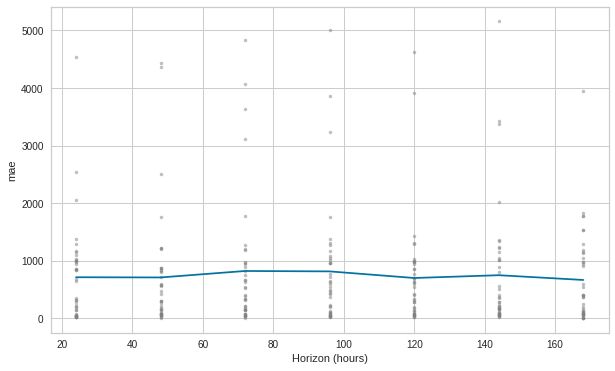

In [62]:
# Plot grafik MAE per horizon
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [63]:
# Nilai MAE yang didapatkan dan berapa nilai akurasi model
print('Average MAE value : ', df_p['mae'].mean()/(df['y'].max() - df['y'].min())*100)
print('Model Accuration Based on MAE : ', 100 - (df_p['mae'].mean())/(df['y'].max() - df['y'].min())*100)

Average MAE value :  5.041201592593388
Model Accuration Based on MAE :  94.95879840740662


Nilai Akurasi Model menunjukkan 94%. Itu artinya, model ini cukup baik untuk digunakan untuk memprediksi tingkat penambahan kasus baru untuk 6 bulan ke-depan

# **Plot Hasil Prediksi**

In [64]:
prediction2 = prediction.loc[(prediction['ds'] > '2021-10-12')]
prediction2 = prediction2[['ds', 'yhat']]

prediction2.columns = ['tanggal', 'kasus_baru']
prediction2['Keterangan'] = 'Prediction'

In [65]:
actual = cov_dki_tidy[['tanggal', 'kasus_baru']]
actual['Keterangan'] = 'Actual'
actual['kasus_baru'] = actual['kasus_baru'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
covid_concat = pd.concat([actual, prediction2]).reset_index().drop(columns='index')

In [67]:
covid_concat

,tanggal,kasus_baru,Keterangan
0,2020-03-01,2.000000,Actual
1,2020-03-02,2.000000,Actual
2,2020-03-03,2.000000,Actual
3,2020-03-04,2.000000,Actual
4,2020-03-05,0.000000,Actual
...,...,...,...
766,2022-04-06,366.804359,Prediction
767,2022-04-07,500.057997,Prediction
768,2022-04-08,510.942938,Prediction
769,2022-04-09,537.973034,Prediction


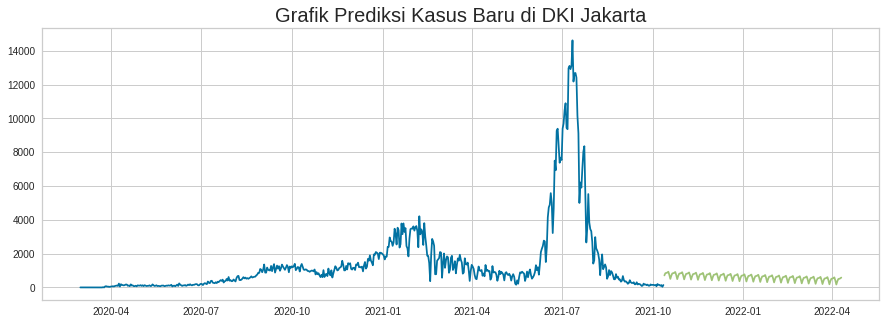

In [68]:
plt.figure(figsize=(15,5))
plt.plot(actual['tanggal'], actual['kasus_baru'])
plt.plot(prediction2['tanggal'], prediction2['kasus_baru'])
plt.title('Grafik Prediksi Kasus Baru di DKI Jakarta', fontsize=20)
plt.show()

## **Menyimpan Data Hasil Prediksi**

In [69]:
prediction.to_csv('prediction_covid-19.csv', index=False)
covid_concat.to_csv('covid_concat.csv', index=False)

# **Kesimpulan & Rekomendasi**

- Model Clustering menghasilkan 4 kelompok cluster yang bisa dihasilkan sebagai upaya dalam menentukan zona-zona kerawanan covid-19. Wilayah-wilayah dikelompokkan menjadi wilayah dengan tingkat paparan Rendah, Sedang, Tinggi, dan Sangat Tinggi dengan Silhoutte Score yang didapat sebesar 0.31. Penentuan zona berdasarkan tingkat paparannya tersebut bisa sebagai dasar dalam prioritas penangan Covid-19 berbasis sektor wilayah yang lebih efektif dan efisien, seperti prioritas bantuan sosial, peningkatan fasilitas kesehatan dan bantuan medis, pembatasan arus perpindahan penduduk dll.
- Model Timeseries Forecasting memprediksi bahwa 6 bulan kedepan jumlah penambahan kasus positif di DKI Jakarta cenderung rendah dan stabil hingga tahun 2022 dengan tingkat akurasi 94%. Hal tersebut sebagai hasil dari program vaksinasi yang dijalankan pemerintah dan program PPKM yang berhasil menurunkan angka penambahan kasus positif secara drastis. trend tersebut bisa sebagai pertimbangan untuk mulai dilakukannya berbagai upaya pemulihan sektor ekonomi secara bertahap dengan berbagai himbauan protokol kesehatan yang terjaga.  Namun, ada potensi terjadi kenaikan kasus kembali pada awal tahun yang perlu Pemerintah waspadai.